# Boston weather visualization
![beany baby <3 ](https://cdn10.bostonmagazine.com/wp-content/uploads/sites/2/2022/06/image002.jpg)

This notebook focuses on visualizing data from the Boston weather data set, primarily with Plotly <3 

## Imports and reading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather = pd.read_csv("/kaggle/input/boston-weather-2013-2023/boston_weather_data.csv", parse_dates=['time'])
weather

,time,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2013-03-01,3.2,1.1,5.0,0.0,342.0,15.1,1002.7
1,2013-03-02,3.1,1.1,5.6,0.0,307.0,14.4,1004.2
2,2013-03-03,2.6,0.6,6.1,0.0,NaN,14.4,1002.6
3,2013-03-04,1.8,-0.6,5.0,0.0,303.0,28.1,1003.0
4,2013-03-05,2.9,0.0,6.1,0.0,NaN,16.6,1013.5
...,...,...,...,...,...,...,...,...
3648,2023-02-25,-7.9,-10.6,-6.7,0.3,313.0,11.9,1029.5
3649,2023-02-26,-4.2,-7.8,3.9,0.0,268.0,11.9,1012.6
3650,2023-02-27,-1.7,-2.8,-0.6,0.0,46.0,18.7,1014.9
3651,2023-02-28,0.6,-1.7,2.2,7.1,86.0,23.8,1010.7


## Preprocessing

In [3]:
# Renaming columns for more clarity
weather = weather.rename(columns={"time":"date", "tavg":"temp_avg",
                        "tmin":"temp_min", "tmax":"temp_max", 
                        "prcp":"precip", "wdir":"wind_dir", 
                        "wspd":"wind_spd", "pres":"pressure"})

# Removing 2013 and 2023 data since it does not include the full year
weather = weather.query('date >= 2014 and date < 2023').copy().reset_index(drop=True)

# Adding date and month columns
weather['year'] = weather.date.dt.strftime('%Y')
weather['month'] = weather.date.dt.strftime('%b')

## Exploring data

In [4]:
weather.describe()

,temp_avg,temp_min,temp_max,precip,wind_dir,wind_spd,pressure
count,3287.000000,3287.000000,3287.000000,3287.000000,2848.000000,3287.000000,3147.000000
mean,11.556343,7.518375,15.878156,2.949498,199.455407,17.652449,1016.514426
std,9.605537,9.429885,10.263156,7.483538,100.258041,6.052148,7.791432
min,-17.700000,-22.700000,-12.100000,0.000000,0.000000,2.500000,983.900000
25%,3.900000,0.600000,7.200000,0.000000,109.000000,13.300000,1011.450000
50%,11.500000,7.800000,15.600000,0.000000,225.000000,16.600000,1016.400000
75%,19.900000,15.850000,24.400000,1.500000,278.000000,21.200000,1021.600000
max,32.300000,28.300000,37.800000,73.700000,360.000000,61.200000,1042.400000


In [5]:
print(f"The highest temperature was {max(weather['temp_max'])} and the lowest temperature was {min(weather['temp_min'])}.")
weather.query('temp_max == 37.8 or temp_min == -22.7')

The highest temperature was 37.8 and the lowest temperature was -22.7.


,date,temp_avg,temp_min,temp_max,precip,wind_dir,wind_spd,pressure,year,month
774,2016-02-14,-17.7,-22.7,-11.0,0.0,297.0,27.7,1027.8,2016,Feb
2737,2021-06-30,31.0,22.2,37.8,4.1,237.0,15.8,1013.6,2021,Jun
3126,2022-07-24,30.6,22.2,37.8,0.0,215.0,21.2,1013.3,2022,Jul


In [6]:
# Creating average temperature dfs for later plotting
avg_temp = weather.groupby(['year', 'month'],sort=False).mean()[['temp_avg', 'temp_min', 'temp_max']].reset_index()
avg_temp_monthly = avg_temp.groupby('month', sort=False).mean().reset_index()

## Visualizations

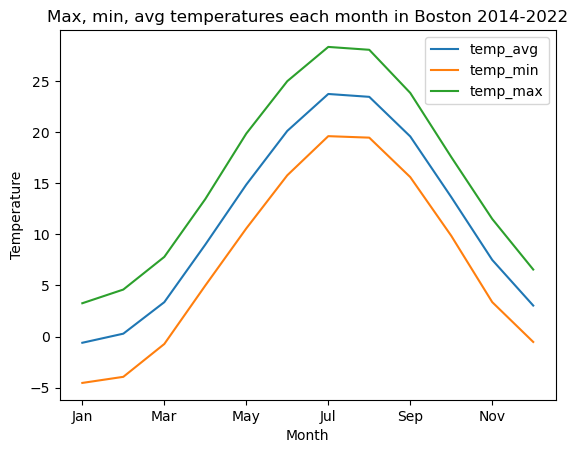

In [7]:
avg_temp.groupby('month', sort=False).mean().plot()
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Max, min, avg temperatures each month in Boston 2014-2022')
plt.show()

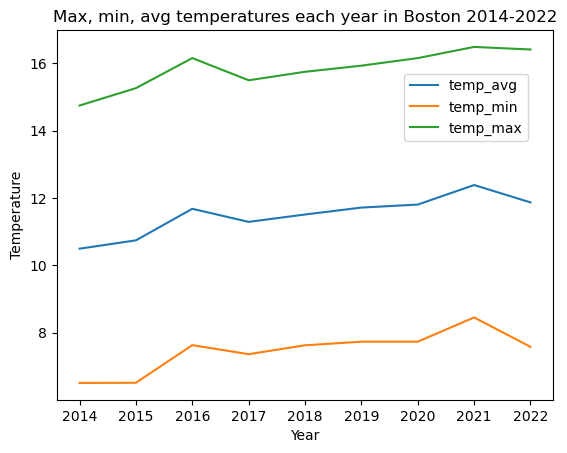

In [8]:
avg_temp.groupby('year', sort=False).mean().plot()
plt.ylabel('Temperature')
plt.xlabel('Year')
plt.title('Max, min, avg temperatures each year in Boston 2014-2022')
plt.legend(loc=(0.7, 0.7))
plt.show()

In [9]:
# More imports
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [10]:
# Create figure
fig = go.Figure()

# Add plot 1 
fig.add_trace(
    go.Scatter(
        x=avg_temp_monthly['month'],
        y=avg_temp_monthly['temp_avg'],
        name="Average temperature"
    ))

# Add plot 2
fig.add_trace(
    go.Bar(
        x=avg_temp_monthly['month'],
        y=avg_temp_monthly['temp_max'],
        name="Maximum temperature"
    ))

# Add plot 3
fig.add_trace(
    go.Bar(
        x=avg_temp_monthly['month'],
        y=avg_temp_monthly['temp_min'],
        name="Minimum temperature"
    ))

# Add labels and title
fig.update_layout(
    title="Monthly temperatures in Boston 2014-2022",
    xaxis_title="Month",
    yaxis_title="Temperature (C)",
    )

# Reveal the beauty 
fig.show()

In [11]:
# Creating df with average precipitation
precip = weather.groupby(["month"], sort=False).mean()[['precip']].reset_index()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add plots
fig.add_trace(go.Bar(
        x=avg_temp_monthly['month'], 
        y=avg_temp_monthly['temp_avg'], 
        name="Average temperature <b>(°C)</b>")
        )

fig.add_trace(go.Scatter(
        x=precip['month'],
        y=precip['precip'],
        name="Precipitation <b>(mm)</b>"),
             secondary_y=True
        )

# Add figure title
fig.update_layout(
    title_text="Average temperature and precipitation in Boston 2014-2022",
    xaxis_title="Month"
)

# Add labels to y-axes
fig.update_yaxes(title_text="Average temperature <b>(°C)</b>", secondary_y=False)
fig.update_yaxes(title_text="Average precipitation <b>(mm)</b>", secondary_y=True)

fig.show()